In [1769]:
import pandas as pd
import seaborn
import numpy as np

### Importing Data

In [1770]:
df = pd.read_csv(r'C:\Users\wled3\ytdf17.csv')

In [1771]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         87 non-null     object
 1   Comments     87 non-null     object
 2   Time         87 non-null     object
 3   Likes        87 non-null     int64 
 4   Reply Count  87 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.5+ KB


### Data preprocessing 

Checking duplicates

In [1772]:
df.duplicated().sum()


0

In [1773]:
df.dropna()

,Name,Comments,Time,Likes,Reply Count
0,Gba Gba,macho la gente dejo de aprender esto? el comen...,2022-04-17T08:50:16Z,0,0
1,Mantis_repair_man,"When I map, NaN values come for some reason, h...",2022-04-04T11:24:24Z,0,0
2,Viet Anh Le,Ultra helpful tutorial for beginner,2021-09-29T18:25:25Z,0,0
3,Manga art,Thanks for the series sentdex! I learned a lot!,2021-04-30T22:42:39Z,0,0
4,Dewawis,"only [[""1K""]] likes???",2021-02-04T04:04:38Z,0,0
...,...,...,...,...,...
82,Alenkruth Murali,You. Are. The. Best.,2019-03-04T15:26:40Z,0,0
83,Shresth Rana,really love what you're doing.\nFinished your ...,2019-03-04T15:15:59Z,1,1
84,jaythizzle1969,"What’s the best, most cost effective way of fi...",2019-03-04T15:15:48Z,0,2
85,hackingatubuntu,"First comment,\nPlz make a traffic generator bot",2019-03-04T15:09:27Z,2,5


In [1774]:
df = df.drop_duplicates()
df.shape

(87, 5)

Remove emojis and special characters

In [1775]:
import re
def cleaning_comments(comment):
  comment = re.sub("[😃|🤣|🤭|🤣|😁|🤭|❤️|👍|🏴|😣|😠|💪|🙏|😞|🌺|🌸|🌞|🌻|💐|💓|😥|💔|😪|😑|🏽|😢|😑|😇|💜|🪴|🙌🏻|🇨🇦|🕊|🕯|😭|😔|💙|🏼|✝|🇿]+",'',str(comment))
  comment = re.sub("[\:|\@|\)|\*|\.|\$|\!|\?|\,|\%|\"|\(|\-|\”|\#|\!|\/|\«|\»|\&|\n|\'|\;|\!|<|>|\'|\’|\\\\]+"," ",str(comment))
  return comment

df['Comments'] = df['Comments'].apply(cleaning_comments)

Convert to lower case

In [1776]:
lower = lambda x: x.lower()
df['Comments'] = df['Comments'].apply(lower)

Get the polarity with the stopwords

In [1777]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

#Create scores col
df['Scores'] = df['Comments'].apply(lambda x: sid.polarity_scores(x))

#Create compund score
df['Compound'] = df['Scores'].apply(lambda score_dict: score_dict['compound'])

#label based on score
df['Polarity'] = df['Compound'].apply(lambda c: 'neutral' if -0.05 < c < 0.05 else ('negative' if c < -0.05 else 'positive'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wled3\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Get the polarity without the stopwords

In [1778]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

stop = stopwords.words('english')

#Create comments without stopwords col
df['comments wo stopwords'] = df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wled3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1779]:
g = df['Compound'].sum()
d = df['Compound'].count()

total_score = g / d
total_score

0.40383103448275853

Add scores and polarity col without stopwords

In [1780]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df['Scores wo stopwords'] = df['comments wo stopwords'].apply(lambda x: sid.polarity_scores(x))

df['compound wo stopwords'] = df['Scores wo stopwords'].apply(lambda score_dict: score_dict['compound'])

df['polarity wo stopwords'] = df['compound wo stopwords'].apply(lambda c: 'neutral' if -0.05 < c < 0.05 else ('negative' if c < -0.05 else 'positive'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wled3\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [1781]:
x = df['compound wo stopwords'].sum()
z = df['compound wo stopwords'].count()

total_score2 = x / z
total_score2

0.4259264367816091

In [1782]:
df["Length"] = df["Comments"].str.len()

Compare the polarity ratio with stopwords and without them

In [1783]:
df['Polarity'].value_counts()

positive    64
neutral     15
negative     8
Name: Polarity, dtype: int64

In [1784]:
df['polarity wo stopwords'].value_counts()

positive    67
neutral     14
negative     6
Name: polarity wo stopwords, dtype: int64

Checking the negative comments

In [1785]:
neg = df[df["Polarity"] == "negative"]

neg.head()

,Name,Comments,Time,Likes,Reply Count,Scores,Compound,Polarity,comments wo stopwords,Scores wo stopwords,compound wo stopwords,polarity wo stopwords,Length
22,bbuggediffy,i needed to add df = df reset_index here in ...,2020-04-10T11:14:39Z,0,0,"{'neg': 0.072, 'neu': 0.928, 'pos': 0.0, 'comp...",-0.3412,negative,needed add df = df reset_index order index col...,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.4404,positive,182
24,Candie Mann,i got this error at 22 30 valueerror found ar...,2020-03-09T20:53:51Z,0,1,"{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'comp...",-0.4019,negative,got error 22 30 valueerror found array dim 3 e...,"{'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'comp...",-0.4019,negative,105
31,Jermaine Haughton,i ran this and used apple stock open high low ...,2019-08-07T05:05:28Z,0,0,"{'neg': 0.119, 'neu': 0.848, 'pos': 0.033, 'co...",-0.5798,negative,ran used apple stock open high low close diffe...,"{'neg': 0.164, 'neu': 0.79, 'pos': 0.046, 'com...",-0.5798,negative,250
45,i3i2ian,did that bad ass just bust out the people s el...,2019-03-11T10:35:13Z,0,0,"{'neg': 0.25, 'neu': 0.571, 'pos': 0.179, 'com...",-0.2500,negative,bad ass bust people elbow,"{'neg': 0.7, 'neu': 0.3, 'pos': 0.0, 'compound...",-0.7906,negative,50
61,Jason Shieh,follow your web and tutorials for long time an...,2019-03-05T08:07:38Z,0,0,"{'neg': 0.076, 'neu': 0.879, 'pos': 0.045, 'co...",-0.2960,negative,follow web tutorials long time thank much got ...,"{'neg': 0.097, 'neu': 0.798, 'pos': 0.105, 'co...",0.0516,positive,201


#### Investigating the relationship between comment length and polarity

In [1786]:
a = df.groupby("Polarity")
a["Length"].mean()

Polarity
negative    135.875000
neutral      89.466667
positive    125.968750
Name: Length, dtype: float64

It seems that negative comments tends to be longer

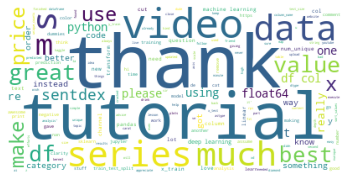

In [1787]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

comments = df["Comments"].values
b = WordCloud(background_color="white").generate(str(comments))

plt.imshow(b)
plt.axis("off")
plt.show()